Populating the interactive namespace from numpy and matplotlib


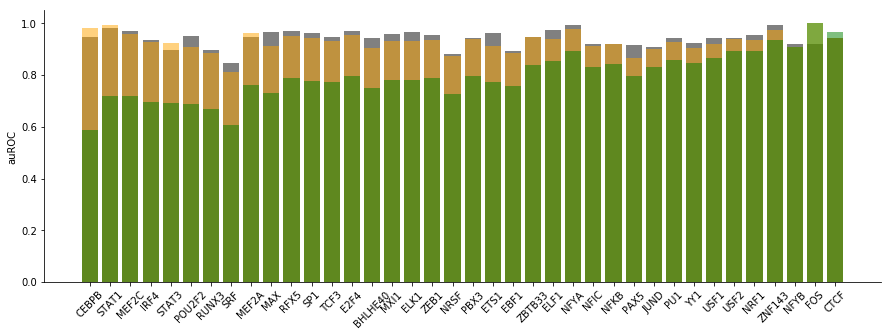

In [1]:
%pylab inline

import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
import pandas as pd

data = pd.read_csv("agentbind-modelcontrols.csv")

data["diff-GC"] = data.apply(lambda x: x["auROC-GC"]-x["auROC-all"], 1)
data["diff-Dnase"] = data.apply(lambda x: x["auROC-GC-Dnase"]-x["auROC-GC"], 1)
data["sizediff-GC"] = data.apply(lambda x: (x["total-GC"])*1.0/x["total-all"], 1)
data["sizediff-Dnase"] = data.apply(lambda x: (x["total-GC-Dnase"])*1.0/x["total-GC"], 1)

data = data.sort_values("diff-Dnase", ascending=True)

# Plot ROCall, ROCgc, ROCDnase
fig = plt.figure()
fig.set_size_inches((15, 5))
ax = fig.add_subplot(111)
ax.bar(range(data.shape[0]), data["auROC-all"], color="gray")
ax.bar(range(data.shape[0]), data["auROC-GC"], color="orange", alpha=0.5)
ax.bar(range(data.shape[0]), data["auROC-GC-Dnase"], color="green", alpha=0.5)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.set_xticks(range(data.shape[0]))
ax.set_xticklabels(data["TF"], rotation=45)
ax.set_ylabel("auROC")

fig.savefig("pdfs/AgentBind_ED1_ModelCompare.pdf")

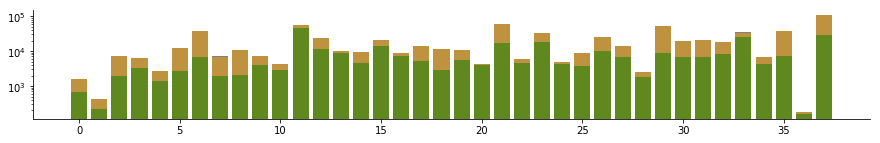

In [2]:
# Plot ROCall, ROCgc, ROCDnase
fig = plt.figure()
fig.set_size_inches((15, 2))
ax = fig.add_subplot(111)
ax.bar(range(data.shape[0]), data["total-all"], color="gray")
ax.bar(range(data.shape[0]), data["total-GC"], color="orange", alpha=0.5)
ax.bar(range(data.shape[0]), data["total-GC-Dnase"], color="green", alpha=0.5)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
plt.yscale("log")
fig.savefig("pdfs/AgentBind_ED1_ModelCompare-samplesize.pdf")

(-0.39873428250945986, 0.013150852114496401)
0.13299352631578945
(0.490054629524985, 0.0017895382071237466)
0.013149289473684232


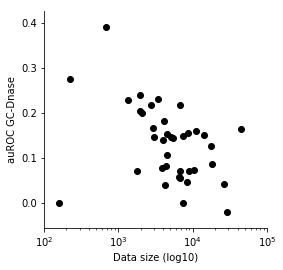

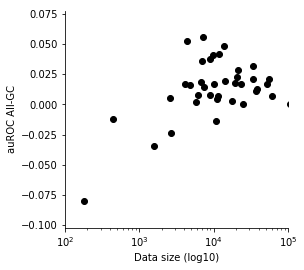

In [3]:
import scipy.stats
fig = plt.figure()
fig.set_size_inches((4, 4))
ax = fig.add_subplot(111)
ax.scatter((data["total-GC-Dnase"]), data["auROC-GC"]-data["auROC-GC-Dnase"], color="black");
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.set_xlim(left=100, right=10**5)
plt.xscale("log")
ax.set_xlabel("Data size (log10)")
ax.set_ylabel("auROC GC-Dnase")
print(scipy.stats.pearsonr(np.log10(data["total-GC-Dnase"]), data["auROC-GC"]-data["auROC-GC-Dnase"]))
print(np.mean(data["auROC-GC"]-data["auROC-GC-Dnase"]))
fig.savefig("pdfs/AgentBind_ED1_ModelCompare-samplesize2.pdf")

fig = plt.figure()
fig.set_size_inches((4, 4))
ax = fig.add_subplot(111)
ax.scatter((data["total-GC"]), data["auROC-all"]-data["auROC-GC"], color="black");
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.set_xlim(left=100, right=10**5)
plt.xscale("log")
ax.set_xlabel("Data size (log10)")
ax.set_ylabel("auROC All-GC")
print(scipy.stats.pearsonr(np.log10(data["total-GC"]), data["auROC-all"]-data["auROC-GC"]))
print(np.mean(data["auROC-all"]-data["auROC-GC"]))
fig.savefig("pdfs/AgentBind_ED1_ModelCompare-samplesize2-GC.pdf")



(-0.39873428250945986, 0.013150852114496401)
0.13299352631578945
(0.4900546295249851, 0.0017895382071237466)
0.013149289473684232


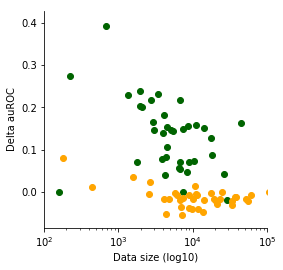

In [38]:
import scipy.stats
fig = plt.figure()
fig.set_size_inches((4, 4))
ax = fig.add_subplot(111)
ax.scatter((data["total-GC-Dnase"]), data["auROC-GC"]-data["auROC-GC-Dnase"], color="darkgreen");
print(scipy.stats.pearsonr(np.log10(data["total-GC-Dnase"]), data["auROC-GC"]-data["auROC-GC-Dnase"]))
print(np.mean(data["auROC-GC"]-data["auROC-GC-Dnase"]))

ax.scatter((data["total-GC"]), data["auROC-GC"]-data["auROC-all"], color="orange");
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.set_xlim(left=100, right=10**5)
plt.xscale("log")
ax.set_xlabel("Data size (log10)")
ax.set_ylabel("Delta auROC")
print(scipy.stats.pearsonr(np.log10(data["total-GC"]), data["auROC-all"]-data["auROC-GC"]))
print(np.mean(data["auROC-all"]-data["auROC-GC"]))
fig.savefig("pdfs/AgentBind_ED1_ModelCompare-samplesize3-GC.pdf")

(-0.12037907896861906, 0.47158534107377065)
(-0.11755734138051453, 0.4821133991235823)


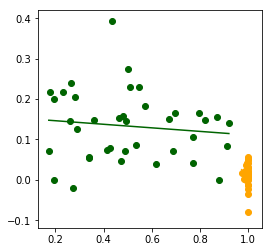

In [42]:
fig = plt.figure()
fig.set_size_inches((4, 4))
ax = fig.add_subplot(111)

data["diff"] = data["total-GC"]/data["total-all"]
data = data.sort_values("diff")
x = data["diff"]
y = data["auROC-all"]-data["auROC-GC"]
ax.scatter(x, y, color="orange");
m, b = np.polyfit(x, y, 1)
ax.plot(x, m*x + b, color="orange")
print(scipy.stats.pearsonr(x, y))

data["diff"] = data["total-GC-Dnase"]/data["total-GC"]
data = data.sort_values("diff")
x = data["diff"]
y = data["auROC-GC"]-data["auROC-GC-Dnase"]
ax.scatter(x, y, color="darkgreen");
m, b = np.polyfit(x, y, 1)
ax.plot(x, m*x + b, color="darkgreen")

print(scipy.stats.pearsonr(x, y))

#ax.set_xlim(left=1, right=100000)
#plt.xscale("log")
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
